In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Import Data

X, y = load_diabetes(return_X_y=True, as_frame=True, scaled=True)
# X.drop(['s6', 'age', 's3'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [3]:
model = 'RF'

clf = RandomForestRegressor() if model=='RF' else LinearRegression()
clf.fit(X_train, y_train)  # train model
clf.score(X_test, y_test)  # evaluate model

0.44128718863974403

In [4]:
# feature importance

data = clf.feature_importances_ if model=='RF' else clf.coef_
pd.Series(data, index=X.columns).sort_values(ascending=False)

bmi    0.343921
s5     0.246124
bp     0.089363
s6     0.066973
age    0.060229
s2     0.057827
s3     0.053515
s1     0.052514
s4     0.018909
sex    0.010625
dtype: float64

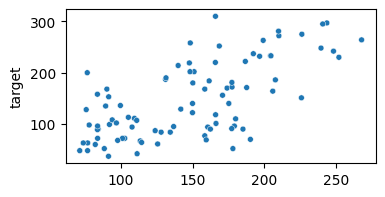

In [5]:
# Scatterplot y=y_true Vs x=y_pred

plt.figure(figsize=(4, 2))
y_pred = clf.predict(X_test)
sns.scatterplot(x=y_pred, y=y_test, size=0.3, legend=False)
plt.show()